### ROC and PR Curves
Global ROC and PR curves for all the tuned ligands

In [1]:
#Imports
library(ROCR)
library(PRROC)
library(ggplot2)
library(gridGraphics)
library(grid)
library(ggpubr)
library(gridExtra)
library(grid)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

Loading required package: grid
Loading required package: magrittr


In [2]:
#Constants
tuning_type <- "global_auprc"
#All data paths
data_path <- paste0("/home/anat/Research/ExAC/10.Prediction/phase2_pred_res/08.06.18_5f_comb_dna0.5_rna0.5_ion0.75/",tuning_type,"/")
ligand_stacking_path <- paste0("~/Research/ExAC/10.Prediction/stacking/2nd_level_pred/08.06.18_dna0.5_rna0.5_ion0.75/",tuning_type,"/ligand_features_probs/")
prob_stacking_path <- paste0("~/Research/ExAC/10.Prediction/stacking/2nd_level_pred/08.06.18_dna0.5_rna0.5_ion0.75/",tuning_type,"/just_probs/")
model_stacking_path <- paste0("~/Research/ExAC/10.Prediction/stacking/2nd_level_pred/08.06.18_dna0.5_rna0.5_ion0.75/",tuning_type,"/model_features/")
all_stacking_path <- paste0("~/Research/ExAC/10.Prediction/stacking/2nd_level_pred/08.06.18_dna0.5_rna0.5_ion0.75/",tuning_type,"/all_features_probs/")

ligands_list <- c("dna", "rna", "ion", "peptide", "sm")
folds_num <- 5
colors_list <- c("#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854", "darkgreen", "blue4", "red4", "yellow4")
model_names <- c("LR", "NN", "RF", "SVM", "XGB")

In [3]:
#===Read the ligands datasets==#
ligand_data <- list()
for (i in 1:length(ligands_list)) {
    ligand <- ligands_list[[i]]
    ligand_filename <- paste0(ligand, "_5w.csv")
    ligand_data[[i]] <- read.csv(paste0(data_path, ligand_filename), header = TRUE, sep = '\t', row.names = 1, stringsAsFactors=FALSE)
}
# Add LIGAND stacked data
for (i in 1:length(ligands_list)) {     
    ligand <- ligands_list[[i]]
    ligand_filename <- paste0(ligand, "_5w.csv")
    ligand_stacking_data <- read.csv(paste0(ligand_stacking_path, ligand_filename), header = TRUE, sep = '\t', row.names = 1, stringsAsFactors=FALSE)
    ligand_stacking_data$model <- paste0("ens-LIGAND")
    ligand_data[[i]] <- rbind(ligand_data[[i]], ligand_stacking_data)
}
# Add PROB stacked data
for (i in 1:length(ligands_list)) {     
    ligand <- ligands_list[[i]]
    ligand_filename <- paste0(ligand, "_5w.csv")
    ligand_stacking_data <- read.csv(paste0(prob_stacking_path, ligand_filename), header = TRUE, sep = '\t', row.names = 1, stringsAsFactors=FALSE)
    ligand_stacking_data$model <- paste0("ens-PROB")
    ligand_data[[i]] <- rbind(ligand_data[[i]], ligand_stacking_data)
}
# Add MODEL stacked data
for (i in 1:length(ligands_list)) {     
    ligand <- ligands_list[[i]]
    ligand_filename <- paste0(ligand, "_5w.csv")
    ligand_stacking_data <- read.csv(paste0(model_stacking_path, ligand_filename), header = TRUE, sep = '\t', row.names = 1, stringsAsFactors=FALSE)
    ligand_stacking_data$model <- paste0("ens-MODEL")
    ligand_data[[i]] <- rbind(ligand_data[[i]], ligand_stacking_data)
}
# Add ALL stacked data
for (i in 1:length(ligands_list)) {     
    ligand <- ligands_list[[i]]
    ligand_filename <- paste0(ligand, "_5w.csv")
    ligand_stacking_data <- read.csv(paste0(all_stacking_path, ligand_filename), header = TRUE, sep = '\t', row.names = 1, stringsAsFactors=FALSE)
    ligand_stacking_data$model <- paste0("ens-ALL")
    ligand_data[[i]] <- rbind(ligand_data[[i]], ligand_stacking_data)
}

#==Read the domain ligands datasets==#
domain_ligand_data <- list()
for (i in 1:length(ligands_list)) {
    ligand <- ligands_list[[i]]
    ligand_filename <- paste0(ligand, "_5w_d.csv")
    domain_ligand_data[[i]] <- read.csv(paste0(data_path, ligand_filename), header = TRUE, sep = '\t', row.names = 1, stringsAsFactors=FALSE)
}
# Add LIGAND stacked data
for (i in 1:length(ligands_list)) {
    ligand <- ligands_list[[i]]
    ligand_filename <- paste0(ligand, "_5w_d.csv")
    domain_ligand_stacking_data <- read.csv(paste0(ligand_stacking_path, ligand_filename), header = TRUE, sep = '\t', row.names = 1, stringsAsFactors=FALSE)
    domain_ligand_stacking_data$model <- paste0("ens-LIGAND")
    domain_ligand_data[[i]] <- rbind(domain_ligand_data[[i]], domain_ligand_stacking_data)
}
# Add PROB stacked data
for (i in 1:length(ligands_list)) {
    ligand <- ligands_list[[i]]
    ligand_filename <- paste0(ligand, "_5w_d.csv")
    domain_ligand_stacking_data <- read.csv(paste0(prob_stacking_path, ligand_filename), header = TRUE, sep = '\t', row.names = 1, stringsAsFactors=FALSE)
    domain_ligand_stacking_data$model <- paste0("ens-PROB")
    domain_ligand_data[[i]] <- rbind(domain_ligand_data[[i]], domain_ligand_stacking_data)
}
# Add MODEL stacked data
for (i in 1:length(ligands_list)) {
    ligand <- ligands_list[[i]]
    ligand_filename <- paste0(ligand, "_5w_d.csv")
    domain_ligand_stacking_data <- read.csv(paste0(model_stacking_path, ligand_filename), header = TRUE, sep = '\t', row.names = 1, stringsAsFactors=FALSE)
    domain_ligand_stacking_data$model <- paste0("ens-MODEL")
    domain_ligand_data[[i]] <- rbind(domain_ligand_data[[i]], domain_ligand_stacking_data)
}
# Add ALL stacked data
for (i in 1:length(ligands_list)) {
    ligand <- ligands_list[[i]]
    ligand_filename <- paste0(ligand, "_5w_d.csv")
    domain_ligand_stacking_data <- read.csv(paste0(all_stacking_path, ligand_filename), header = TRUE, sep = '\t', row.names = 1, stringsAsFactors=FALSE)
    domain_ligand_stacking_data$model <- paste0("ens-ALL")
    domain_ligand_data[[i]] <- rbind(domain_ligand_data[[i]], domain_ligand_stacking_data)
}

#==Read the AUPRC tables==#
auprc_data <- list()
for (i in 1:length(ligands_list)) {
    ligand <- ligands_list[[i]]
    auprc_filename <- paste0(ligand, "_5w_auprc.csv")
    auprc_data[[i]] <- read.csv(paste0(data_path, auprc_filename), header = TRUE, sep = '\t', row.names = 1, stringsAsFactors=FALSE)
}
# Add LIGAND stacked data
for (i in 1:length(ligands_list)) {
    ligand <- ligands_list[[i]]
    auprc_filename <- paste0(ligand, "_5w_auprc.csv")
    auprc_stacking_data <- read.csv(paste0(ligand_stacking_path, auprc_filename), header = TRUE, sep = '\t', row.names = 1, stringsAsFactors=FALSE)
    auprc_data[[i]] <- cbind(auprc_data[[i]], auprc_stacking_data)
    names(auprc_data[[i]])[length(names(auprc_data[[i]]))]<-"ens-LIGAND"
}
# Add PROB stacked data
for (i in 1:length(ligands_list)) {
    ligand <- ligands_list[[i]]
    auprc_filename <- paste0(ligand, "_5w_auprc.csv")
    auprc_stacking_data <- read.csv(paste0(prob_stacking_path, auprc_filename), header = TRUE, sep = '\t', row.names = 1, stringsAsFactors=FALSE)
    auprc_data[[i]] <- cbind(auprc_data[[i]], auprc_stacking_data)
    names(auprc_data[[i]])[length(names(auprc_data[[i]]))]<-"ens-PROB"
}
# Add MODEL stacked data
for (i in 1:length(ligands_list)) {
    ligand <- ligands_list[[i]]
    auprc_filename <- paste0(ligand, "_5w_auprc.csv")
    auprc_stacking_data <- read.csv(paste0(model_stacking_path, auprc_filename), header = TRUE, sep = '\t', row.names = 1, stringsAsFactors=FALSE)
    auprc_data[[i]] <- cbind(auprc_data[[i]], auprc_stacking_data)
    names(auprc_data[[i]])[length(names(auprc_data[[i]]))]<-"ens-MODEL"
}
# Add ALL stacked data
for (i in 1:length(ligands_list)) {
    ligand <- ligands_list[[i]]
    auprc_filename <- paste0(ligand, "_5w_auprc.csv")
    auprc_stacking_data <- read.csv(paste0(all_stacking_path, auprc_filename), header = TRUE, sep = '\t', row.names = 1, stringsAsFactors=FALSE)
    auprc_data[[i]] <- cbind(auprc_data[[i]], auprc_stacking_data)
    names(auprc_data[[i]])[length(names(auprc_data[[i]]))]<-"ens-ALL"
}

In [4]:
#Rename Logistic
for (i in 1:length(ligands_list)) {
    ligand_data[[i]]$model[ligand_data[[i]]$model == "Logistic"] <- "LR"
    domain_ligand_data[[i]]$model[domain_ligand_data[[i]]$model == "Logistic"] <- "LR"
    colnames(auprc_data[[i]])[colnames(auprc_data[[i]])=="Logistic"] <- "LR"
}

In [5]:
#Arrange factor models order
for (i in 1:length(ligands_list)) {
    ligand_data[[i]]$model <- factor(ligand_data[[i]]$model, levels =c("XGB", "LR", "SVM", "RF", "NN", "ens-LIGAND", "ens-PROB", "ens-MODEL", "ens-ALL"))
}

### ROC curves

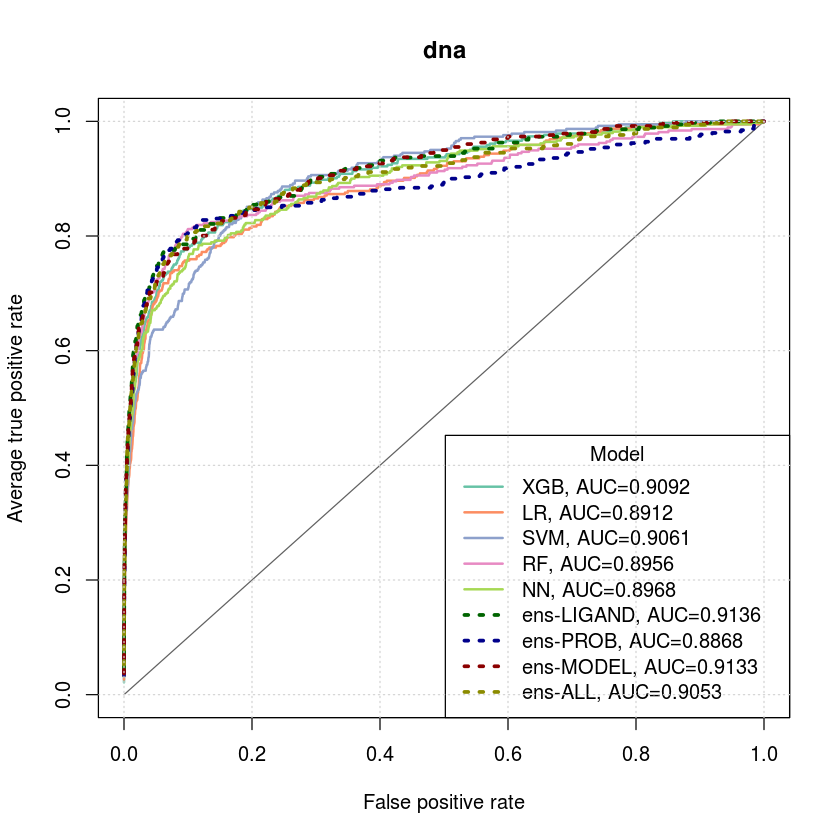

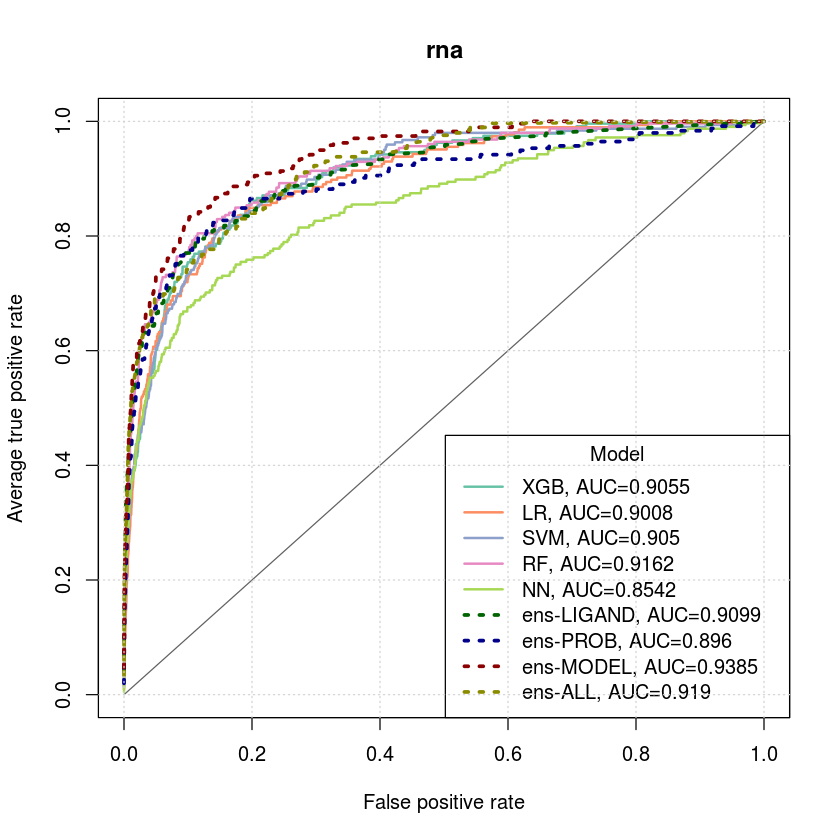

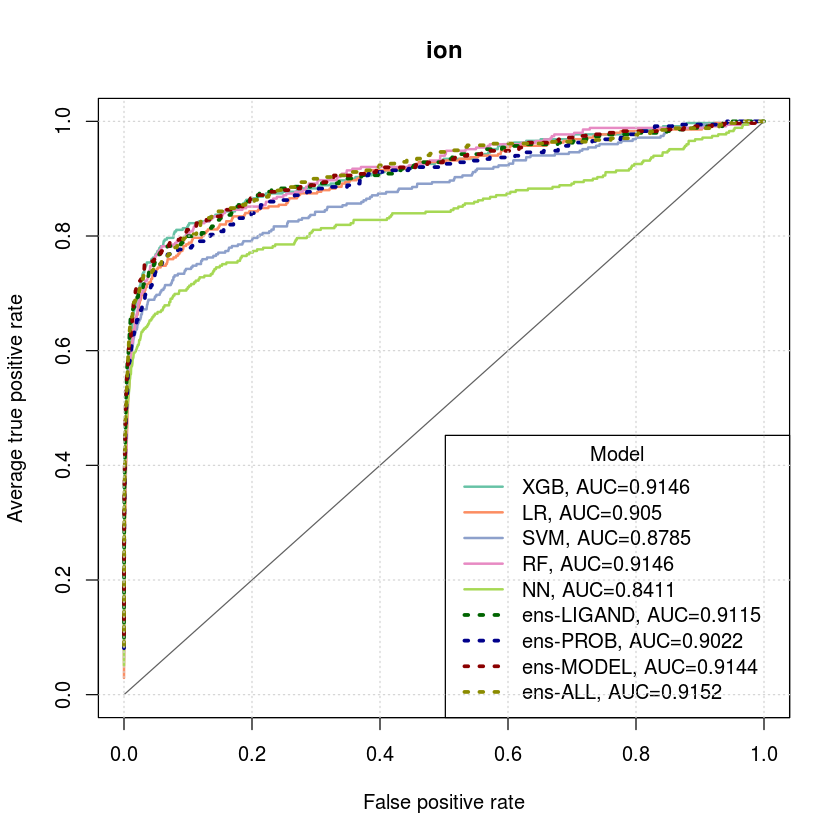

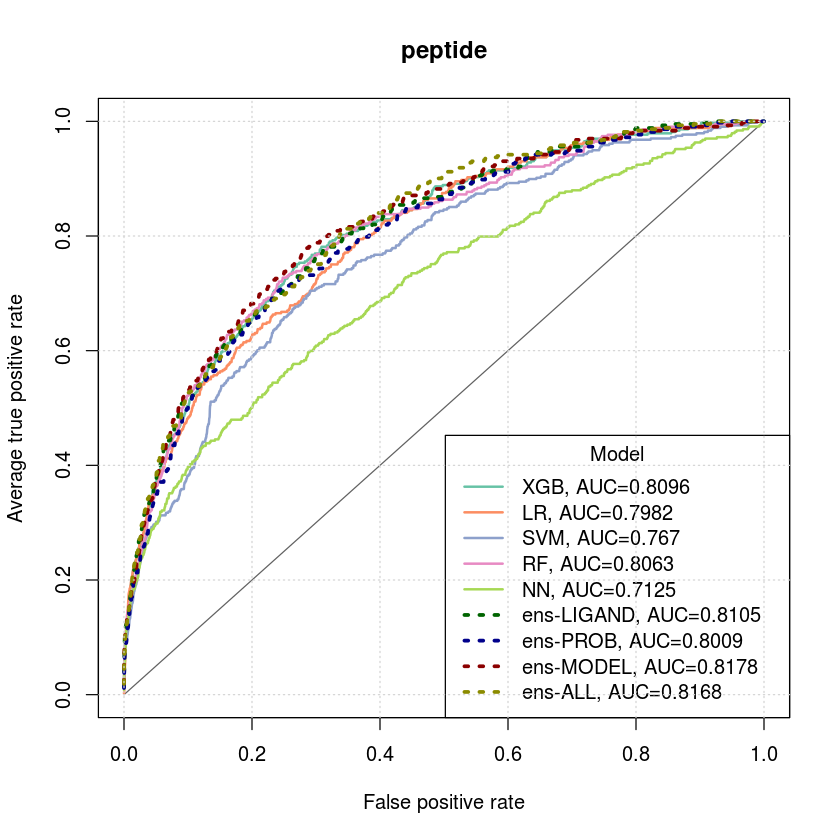

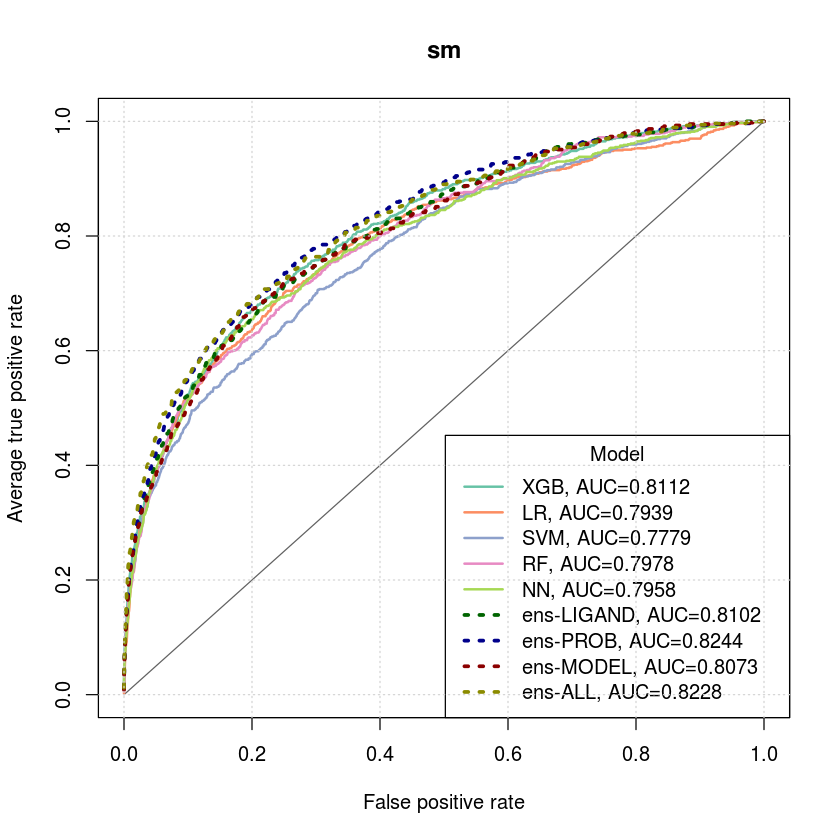

In [6]:
## ROC curves
#Arrange the data according to models and folds
save_to_file <- FALSE
models_data <- list()
pred_folds <- list()
labels_folds <- list()
pred_obj <- list()
roc_perf_obj <- list()
auc_res <- list()
ac_obj <- list()
legend_str <- list()
roc_plots_list <- list()

for (i in 1:length(ligands_list)) {
    #Split by the different models
    models_data[[i]] <- split(ligand_data[[i]], ligand_data[[i]]$model)
    models_names <- attributes(models_data[[i]])$name
  
    #init model lists
    pred_folds[[i]] <- list()
    labels_folds[[i]] <- list()
    pred_obj[[i]] <- list()
    roc_perf_obj[[i]] <- list()
    auc_res[[i]] <- list()

    #For each model, split by different folds
    for (j in 1:length(models_names)) {
  
        model_name <- models_names[j]
    
        pred_folds[[i]][[j]] <- split(models_data[[i]][[model_name]]$prob, models_data[[i]][[model_name]]$fold)
        labels_folds[[i]][[j]] <- split(models_data[[i]][[model_name]]$obs, models_data[[i]][[model_name]]$fold)
    
        pred_obj[[i]][[j]] <- prediction(pred_folds[[i]][[j]], labels_folds[[i]][[j]])
        roc_perf_obj[[i]][[j]] <- performance(pred_obj[[i]][[j]],"tpr","fpr")
    
        ac_obj[[i]] <- performance(pred_obj[[i]][[j]], "auc")
        auc_res[[i]][[j]] <- round(mean(as.numeric(ac_obj[[i]]@y.values)), 4)
    
        #ROC curve
        if (j == 1) {
            if (save_to_file) {
                #pdf(paste0("plots/",ligands_list[[i]],"_roc.pdf"))
                #png(paste0("plots/",ligands_list[[i]],"_roc.png"))
                svg(paste0("plots/",ligands_list[[i]],"_roc.svg"))
            }
            plot(roc_perf_obj[[i]][[j]],col=colors_list[j], lwd=2,avg="vertical", main=ligands_list[[i]])
            lines(x = c(0,1), y = c(0,1), col="grey38")
        } else if (j >= 6) {
            plot(roc_perf_obj[[i]][[j]],col=colors_list[j], lwd=3, lty=3, avg="vertical", add=TRUE)
        } else {
            plot(roc_perf_obj[[i]][[j]],col=colors_list[j], lwd=2,avg="vertical", add=TRUE)
        }
    }
    legend_str[[i]] <-  paste0(models_names,", AUC=", auc_res[[i]])
    legend("bottomright", title= "Model", legend_str[[i]], lwd=c(2,2,2,2,2,3,3,3,3), lty=c(1,1,1,1,1,3,3,3,3), col=colors_list)
    grid(nx = NULL, ny = NULL, col = "lightgray", lty = "dotted")
    if (save_to_file) {
        dev.off()
    }
}

### AUPRC curves

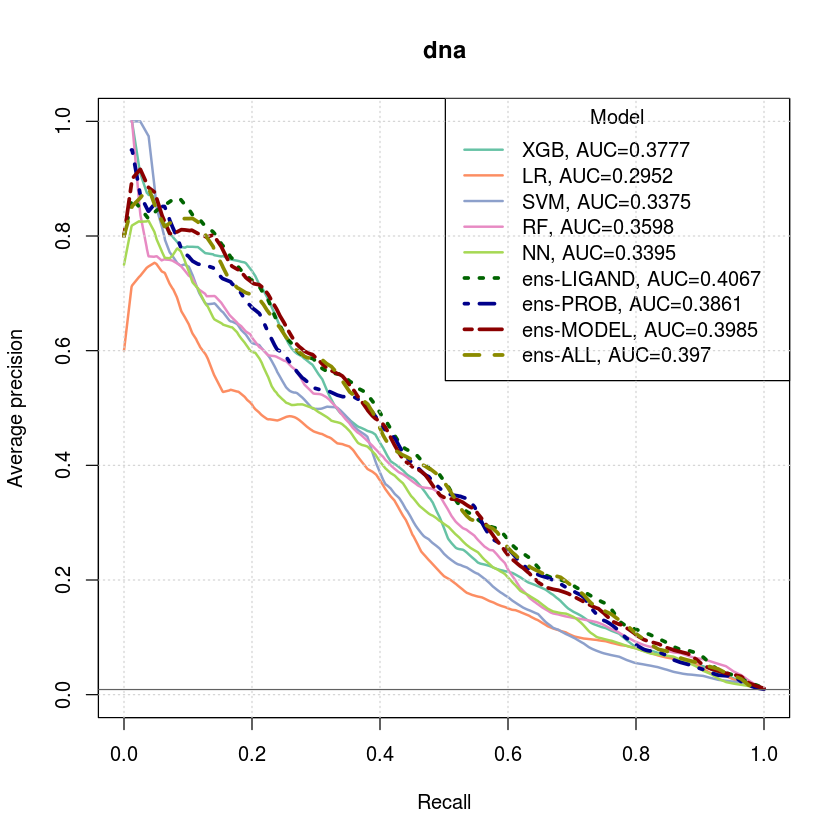

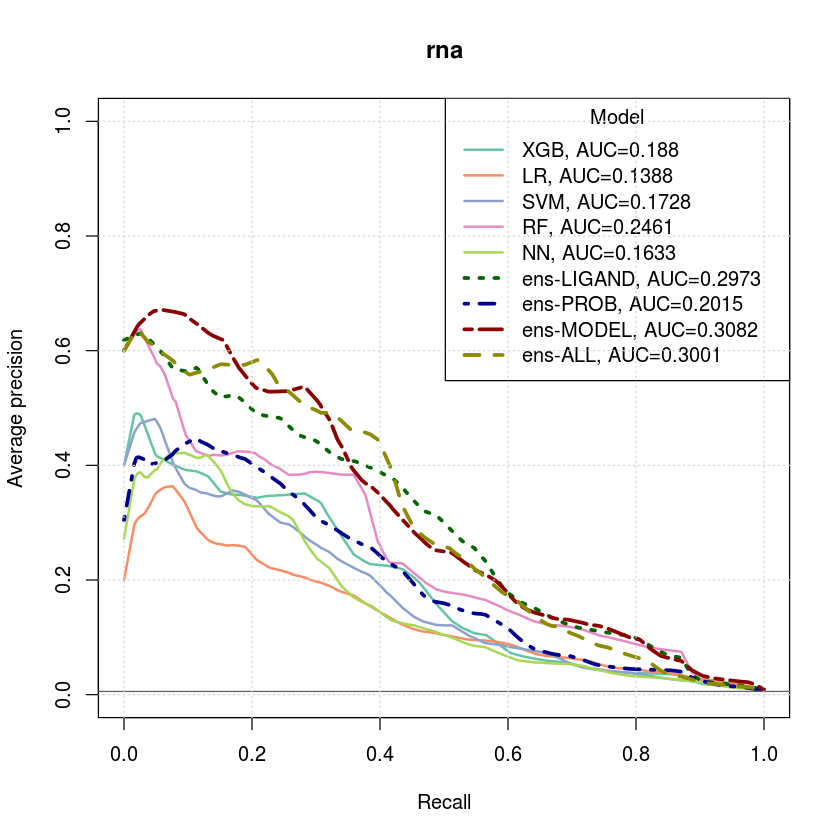

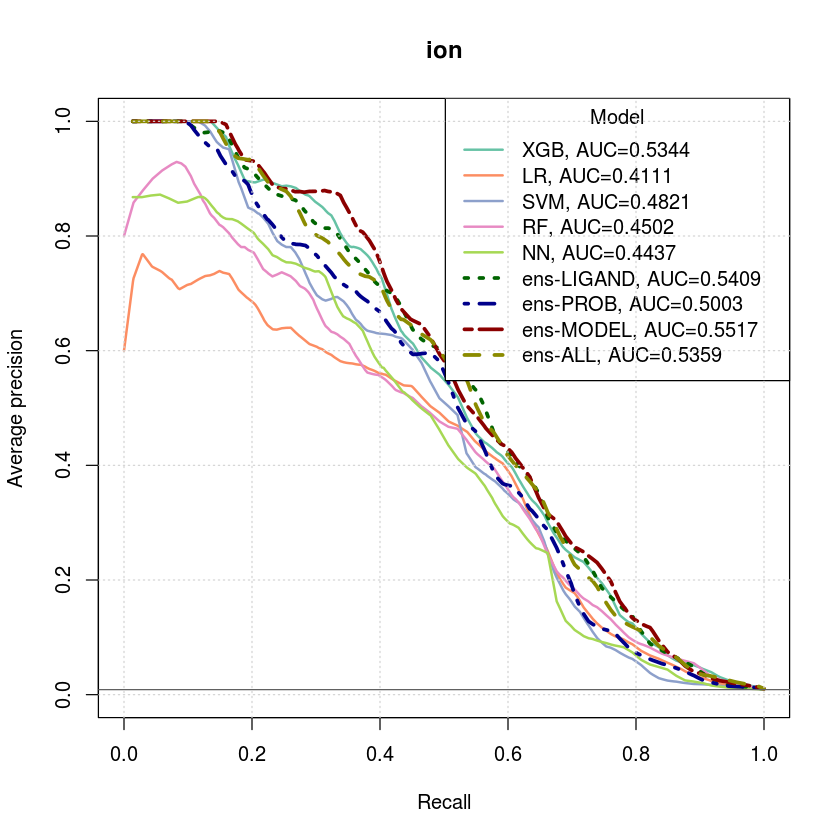

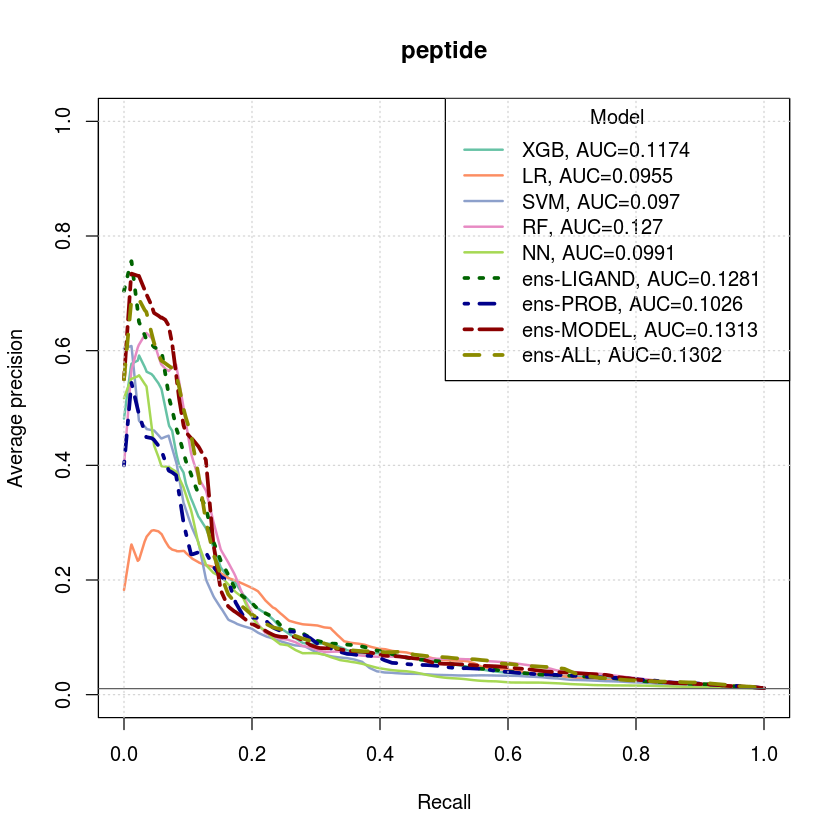

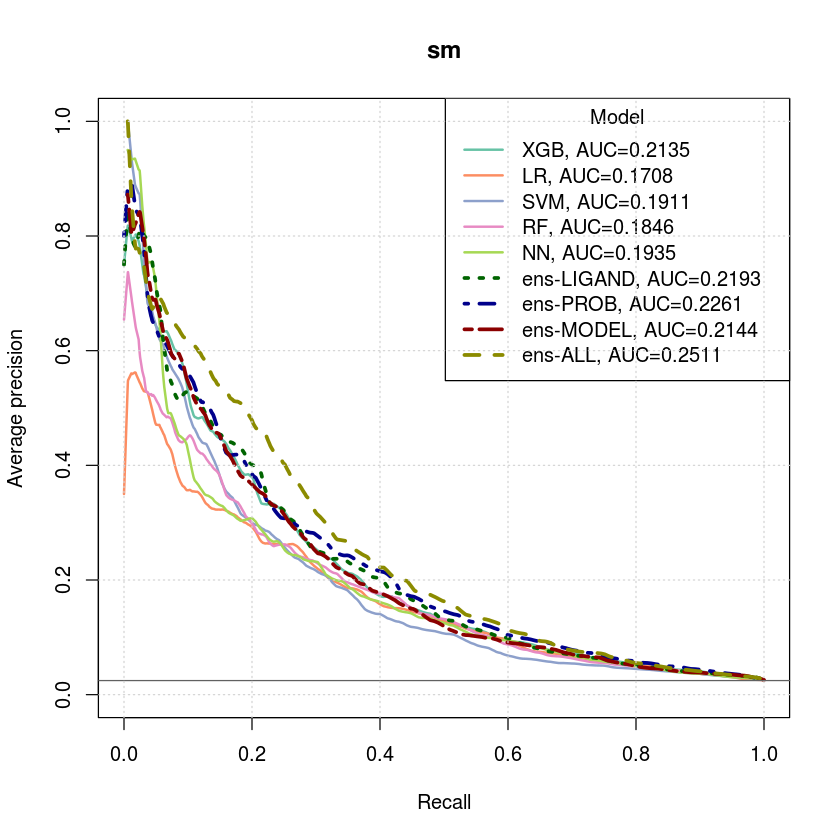

In [7]:
save_to_file <- FALSE
models_data <- list()
pred_folds <- list()
labels_folds <- list()
pred_obj <- list()
pr_perf_obj <- list()
auprc_res <- list()
ac_obj <- list()
legend_str <- list()
positives_num <- list()
total_num <- list()
random_val <- list()
postivies_prob <- list()
negatives_prob <- list()
pr_plots_list <- list()

for (i in 1:length(ligands_list)) {

    #Split by the different models
    models_data[[i]] <- split(ligand_data[[i]], ligand_data[[i]]$model)
    models_names <- attributes(models_data[[i]])$name

    #init model lists
    pred_folds[[i]] <- list()
    labels_folds[[i]] <- list()
    pred_obj[[i]] <- list()
    pr_perf_obj[[i]] <- list()
    auprc_res[[i]] <- list()
    postivies_prob[[i]] <- list()
    negatives_prob[[i]] <- list()

    #For each model, split by different folds
    for (j in 1:length(models_names)) {

        model_name <- models_names[j]

        pred_folds[[i]][[j]] <- split(models_data[[i]][[model_name]]$prob, models_data[[i]][[model_name]]$fold)
        labels_folds[[i]][[j]] <- split(models_data[[i]][[model_name]]$obs, models_data[[i]][[model_name]]$fold)

        pred_obj[[i]][[j]] <- prediction(pred_folds[[i]][[j]], labels_folds[[i]][[j]])
        pr_perf_obj[[i]][[j]] <- performance(pred_obj[[i]][[j]],"prec","rec")

        #parse AUPRC
        div_num <- folds_num
        auprc_res[[i]][[j]] <- round(sum(auprc_data[[i]][[model_name]], na.rm=T)/div_num, 4)

        #PR curve
        if (j == 1) {
            if (save_to_file) {
                #pdf(paste0("plots/",ligands_list[[i]],"_pr.pdf"))
                #png(paste0("plots/",ligands_list[[i]],"_pr.png"))
                svg(paste0("plots/",ligands_list[[i]],"_pr.svg"))
            }
            #plot(perf_obj[[i]][[j]],col="grey82",lty=3)
            plot(pr_perf_obj[[i]][[j]],col=colors_list[j], lwd=2,avg="vertical", main=ligands_list[[i]], xlim=c(0, 1), ylim=c(0,1))
            #plot(roc_perf_obj[[i]][[j]],col=colors_list[j], lwd=3,avg="vertical", main="small-molecule")
        } else if (j == 6) {
            plot(pr_perf_obj[[i]][[j]],col=colors_list[j], lwd=3, lty=3, avg="vertical", add=TRUE)
        } else if (j == 7) {
            plot(pr_perf_obj[[i]][[j]],col=colors_list[j], lwd=3, lty=4, avg="vertical", add=TRUE)
        } else if (j == 8) {
            plot(pr_perf_obj[[i]][[j]],col=colors_list[j], lwd=3, lty=6, avg="vertical", add=TRUE)
        } else if (j == 9) {
            plot(pr_perf_obj[[i]][[j]],col=colors_list[j], lwd=3, lty=2, avg="vertical", add=TRUE)
        } else {
            
            plot(pr_perf_obj[[i]][[j]],col=colors_list[j], lwd=2,avg="vertical", xlim=c(0, 1), ylim=c(0,1), add=TRUE)
        }
    }
    #Compute random line
    postivies_prob[[i]][[j]] <- subset(models_data[[i]][[model_name]], obs==1)$prob
    negatives_prob[[i]][[j]] <- subset(models_data[[i]][[model_name]], obs==0)$prob
    positives_num[[i]] <- length(postivies_prob[[i]][[j]])
    total_num[[i]] <- length(negatives_prob[[i]][[j]]) + positives_num[[i]]
    random_val[[i]] <- positives_num[[i]]/total_num[[i]]
    #print(random_val[[i]])
    abline(h=random_val[[i]], col="grey38")

    #Add legend
    legend_str[[i]] <-  paste0(models_names,", AUC=", auprc_res[[i]])
    legend("topright", title= "Model", legend_str[[i]], lwd=c(2,2,2,2,2,3,3,3,3), lty=c(1,1,1,1,1,3,4,6,2), col=colors_list)
    grid(nx = NULL, ny = NULL, col = "lightgray", lty = "dotted")
    if (save_to_file) {
        dev.off()
    }
}


### Bar plots of AUC/AUPRC

In [8]:
chosen_model <- list()

#Create AUPRC df for plotting
auprc_df_list <- list()
for (i in 1:length(ligands_list)) {
    curr_auprc <- as.vector(auprc_res[[i]])
    auprc_df <- as.data.frame(cbind(unlist(models_names), unlist(curr_auprc)))
    colnames(auprc_df) <- c("model", "AUPRC")
    auprc_df$AUPRC <- as.numeric(as.character(auprc_df$AUPRC))
    auprc_df$model <- factor(auprc_df$model, levels =c("XGB", "LR", "SVM", "RF", "NN", "ens-LIGAND", "ens-PROB", "ens-MODEL", "ens-ALL"))
    auprc_df$ligand <- ligands_list[[i]]
    #Adding lables according to max.
    max_auprc <- max(auprc_df$AUPRC)
    print(max_auprc)
    chosen_model[[i]] <- which(auprc_df$AUPRC==max_auprc)
    labels <- ifelse(auprc_df$AUPRC==max_auprc, auprc_df$AUPRC, "")
    auprc_df$label <- labels
    auprc_df_list[[i]] <- auprc_df
}
auprc_all_df <- rbind(auprc_df_list[[1]], auprc_df_list[[2]], auprc_df_list[[3]], auprc_df_list[[4]], auprc_df_list[[5]])
auprc_all_df$ligand <- factor(auprc_all_df$ligand, levels =c("rna", "dna", "ion", "peptide", "sm"))

[1] 0.4067
[1] 0.3082
[1] 0.5517
[1] 0.1313
[1] 0.2511


In [9]:
chosen_model

[[1]]
[1] 6

[[2]]
[1] 8

[[3]]
[1] 8

[[4]]
[1] 8

[[5]]
[1] 9

In [10]:
#Create AUC df for plotting
auc_df_list <- list()
for (i in 1:length(ligands_list)) {
    curr_auc <- as.vector(auc_res[[i]])
    auc_df <- as.data.frame(cbind(unlist(models_names), unlist(curr_auc)))
    colnames(auc_df) <- c("model", "AUC")
    auc_df$AUC <- as.numeric(as.character(auc_df$AUC))
    auc_df$model <- factor(auc_df$model, levels =c("XGB", "LR", "SVM", "RF", "NN", "ens-LIGAND", "ens-PROB", "ens-MODEL", "ens-ALL"))
    auc_df$ligand <- ligands_list[[i]]
    #Adding lables
    chosen_model_auc <- auc_df$AUC[[chosen_model[[i]]]]
    print(chosen_model_auc)
    labels <- ifelse(auc_df$AUC==chosen_model_auc, auc_df$AUC, "")
    auc_df$label <- labels
    auc_df_list[[i]] <- auc_df
}
auc_all_df <- rbind(auc_df_list[[1]], auc_df_list[[2]], auc_df_list[[3]], auc_df_list[[4]], auc_df_list[[5]])
auc_all_df$ligand <- factor(auc_all_df$ligand, levels =c("rna", "dna", "ion", "peptide", "sm"))

[1] 0.9136
[1] 0.9385
[1] 0.9144
[1] 0.8178
[1] 0.8228


In [11]:
bars_colors <- c("#b3e2cd", "#fdcdac", "#cbd5e8", "#f4cae4", "#e6f5c9", "#e7298a", "#7570b3", "#d95f02", "#1b9e77")

aucpr_plot <- ggplot(auprc_all_df, aes(x=ligand, y=AUPRC, fill=model)) +
    geom_bar(aes(fill = model), position = "dodge", colour="black", stat="identity") +
    geom_text(aes(label=label), position=position_dodge(width=0.9), vjust=-0.25, size=3) +
    coord_cartesian(ylim=c(0,0.6)) +
    scale_fill_manual(values=bars_colors) +
    scale_colour_manual(values="black") +
    xlab("") +
    theme_bw() +
    theme(axis.text.x = element_blank(),
          panel.grid.major.x = element_blank(),
          axis.ticks.x = element_blank())
auc_plot <- ggplot(auc_all_df, aes(x=ligand, y=AUC, fill=model)) +
    geom_bar(aes(fill = model), position = "dodge", colour="black", stat="identity") +
    geom_text(aes(label=label), position=position_dodge(width=0.9), vjust=-0.25, size=3) +
    coord_cartesian(ylim=c(0.6,1)) +
    scale_fill_manual(values=bars_colors) +
    scale_colour_manual(values="black") +
    xlab("") +
    theme_bw() +
    theme(axis.text.x = element_blank(),
          panel.grid.major.x = element_blank(),
          axis.ticks.x = element_blank())

png 
  2

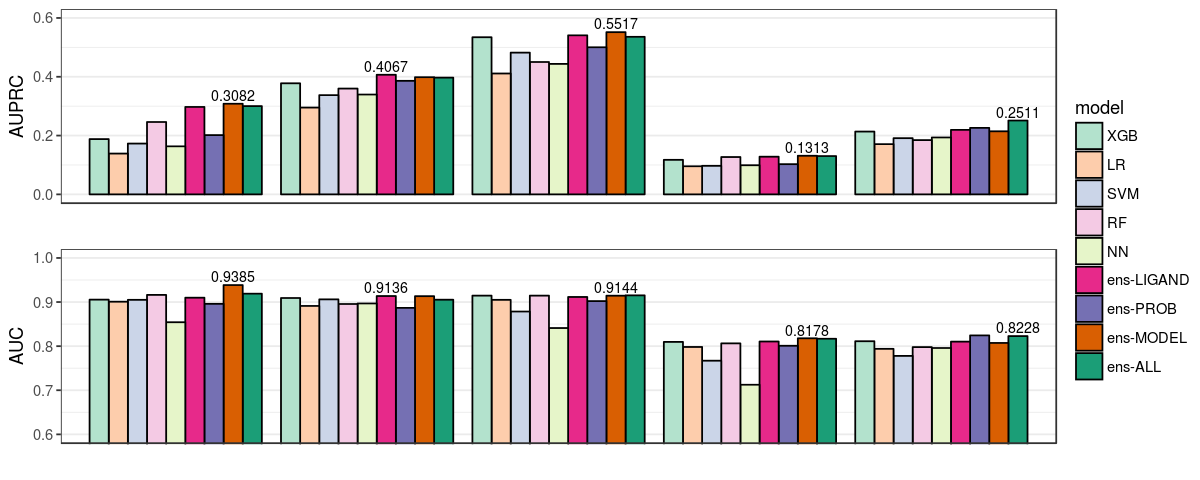

In [12]:
bars_plots <- list(aucpr_plot, auc_plot)
options(repr.plot.width=10, repr.plot.height=4)
svg("plots/auc_auprc_bars.svg", width=10, height=4)
final_fig <- ggarrange(plotlist=bars_plots, ncol = 1, nrow=2, common.legend = TRUE, legend="right")
final_fig
dev.off()
final_fig

### Bar Plot of just the stacked models AUPRC with *

In [20]:
#Filter plotting df for just the ensemble models
ens_models <- c("ens-LIGAND", "ens-PROB", "ens-MODEL", "ens-ALL")
auprc_ens_df <- subset(auprc_all_df, model %in% ens_models)

#Turn labels of chosen models to (*)
auprc_ens_df$label <- ifelse(auprc_ens_df$label == "", "", "*")

#Just ens colors
ens_colors <- c("#e7298a", "#7570b3", "#d95f02", "#1b9e77")

In [50]:
#Plot just the AUPRC bars
aucpr_ens_plot <- ggplot(auprc_ens_df, aes(x=ligand, y=AUPRC, fill=model)) +
    geom_bar(aes(fill = model), position = "dodge", colour="black", stat="identity") +
    geom_text(aes(label=label), position=position_dodge(width=0.9), vjust=0, size=5) +
    coord_cartesian(ylim=c(0,0.6)) +
    scale_fill_manual(values=ens_colors) +
    scale_colour_manual(values="black") +
    scale_y_continuous(breaks=c(0,0.1,0.2,0.3,0.4,0.5,0.6),labels=c("0","0.1","0.2","0.3","0.4","0.5","0.6")) +
    xlab("") +
    theme_bw() +
    theme(axis.text.x = element_blank(),
          panel.grid.major.x = element_blank(),
          axis.ticks.x = element_blank(),
          panel.grid.minor.y = element_blank())

png 
  2

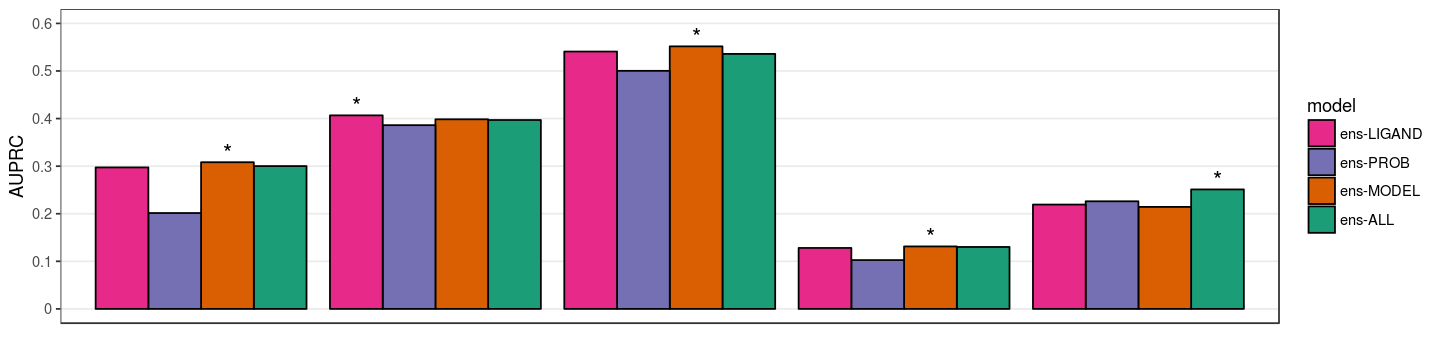

In [55]:
options(repr.plot.width=12, repr.plot.height=3)
svg("plots/auprc_only_bars.svg", width=12, height=3)
aucpr_ens_plot
dev.off()
aucpr_ens_plot

### Bar Plot of each ligands seperately, base-models and stacked grouped together

In [35]:
#Filter plotting df for the two models types
ens_models <- c("ens-LIGAND", "ens-PROB", "ens-MODEL", "ens-ALL")
base_models <- c("XGB", "LR", "SVM", "RF", "NN")
auprc_ens_df <- subset(auprc_all_df, model %in% ens_models)
auprc_base_df <- subset(auprc_all_df, model %in% base_models)

#two colors lists
ens_colors <- c("#e7298a", "#7570b3", "#d95f02", "#1b9e77")
base_colors <- c("#b3e2cd", "#fdcdac", "#cbd5e8", "#f4cae4", "#e6f5c9")

#Add labels to the base-models df
for (i in 1:length(ligands_list)) {
    curr_ligand <- ligands_list[[i]]
    curr_auprc <- as.vector(subset(auprc_base_df, ligand == curr_ligand)$AUPRC)
    
    #Adding lables according to max.
    max_auprc <- max(curr_auprc)
    print(max_auprc)
    max_idx <- which(auprc_base_df$AUPRC == max_auprc)
    auprc_base_df[max_idx,]$label <- max_auprc
}

[1] 0.3777
[1] 0.2461
[1] 0.5344
[1] 0.127
[1] 0.2135


In [143]:
#Create plots per ligand
bars_dummy_colors <- c("#b3e2cd", "#fdcdac", "#cbd5e8", "#f4cae4", "#e6f5c9", "white", "#7570b3", "#e7298a", "#66a61e", "#e6ab02")
#bars_dummy_colors <- c("#b3e2cd", "#fdcdac", "#cbd5e8", "#f4cae4", "#e6f5c9", "white", "#e7298a", "#7570b3", "#d95f02", "#1b9e77")

#bars_dummy_colors <- c("#b3e2cd", "#fdcdac", "#cbd5e8", "#f4cae4", "#e6f5c9", "white", "#e78ac3", "#8da0cb", "#fc8d62", "#66c2a5")
ligands_list <- c("rna", "dna", "ion", "peptide", "sm")
ligands_str <- c("RNA", "DNA", "ion", "peptide", "small molecule")

plots_list <- list()
for (i in 1:length(ligands_list)) {
    curr_ligand <- ligands_list[[i]]
    dummy_line <- data.frame(model="", AUPRC=0, ligand=curr_ligand, label="")
    ligand_plot_df <- rbind(subset(auprc_base_df, ligand == curr_ligand), dummy_line, subset(auprc_ens_df, ligand == curr_ligand))
    ligand_plot_df$model <- factor(ligand_plot_df$model, levels=c("XGB", "LR", "SVM", "RF", "NN", "", "ens-LIGAND", "ens-MODEL", "ens-ALL", "ens-PROB"))
    
    if (curr_ligand == "dna") {
        ylim_vals <- c(0.25,0.42)
        breaks_vals <- c(0.25, 0.3, 0.35, 0.4)
        breaks_labels <- c("0.25","0.3","0.35","0.4")
    } else if (curr_ligand == "rna") {
        ylim_vals <- c(0.1,0.33)
        breaks_vals <- c(0.1, 0.15, 0.2, 0.25, 0.3)
        breaks_labels <- c("0.1", "0.15","0.2","0.25","0.3")
    } else if (curr_ligand == "ion") {
        ylim_vals <- c(0.35,0.57)
        breaks_vals <- c(0.35, 0.4, 0.45, 0.5, 0.55)
        breaks_labels <- c("0.35","0.4","0.45","0.5", "0.55")
    } else if (curr_ligand == "peptide") {
        ylim_vals <- c(0.01,0.14)
        breaks_vals <- c(0.025, 0.05, 0.075, 0.1, 0.125)
        breaks_labels <- c("0.025", "0.05", "0.075", "0.1", "0.125")
    } else {
        ylim_vals <- c(0.15,0.26)
        breaks_vals <- c(0.15, 0.2, 0.25, 0.3)
        breaks_labels <- c("0.15","0.2","0.25","0.3")
    }
    plots_list[[i]] <-  ggplot(ligand_plot_df, aes(x=ligand, y=AUPRC, fill=model)) +
        geom_bar(aes(fill = model), position = "dodge", colour="black", stat="identity") +
        geom_text(aes(label=label), position=position_dodge(width=0.9), vjust=-0.5, size=2.5) +
        coord_cartesian(ylim=ylim_vals) +
        scale_fill_manual(values=bars_dummy_colors) +
        scale_colour_manual(values="black") +
        guides(fill=FALSE) +
        scale_y_continuous(breaks=breaks_vals,labels=breaks_labels) +
        xlab("") +
        ylab("") +
        ggtitle(ligands_str[[i]]) +
        theme_bw() +
        theme(axis.text.x = element_blank(),
              panel.grid.major.x = element_blank(),
              axis.ticks.x = element_blank(),
              panel.grid.minor.y = element_blank(),
              plot.title=element_text(hjust=0.5, size=12))
}

png 
  2

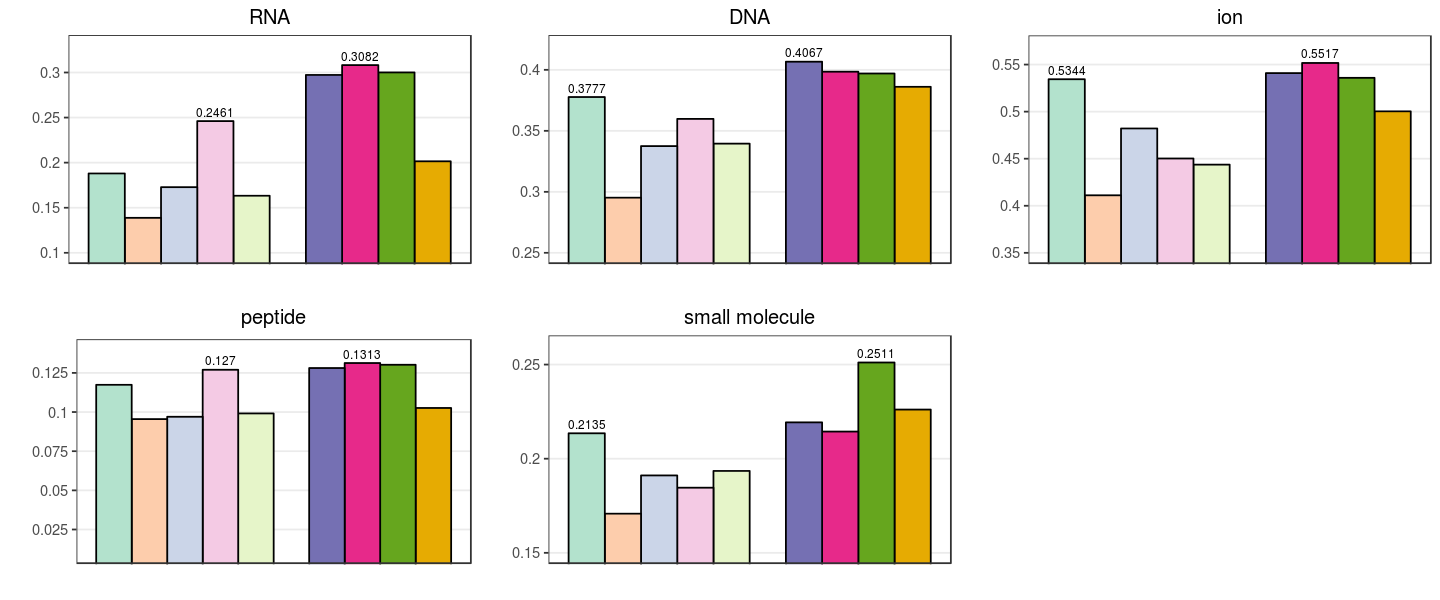

In [144]:
#Combine all the plots together
options(repr.plot.width=12, repr.plot.height=5)
svg("plots/bars_per_ligand.svg", width=12, height=5)
final_fig <- ggarrange(plotlist=plots_list, ncol = 3, nrow=2, common.legend = TRUE, legend="right")
final_fig
dev.off()
final_fig